**STUDENTS STRESS LEVEL IN AN EDUCATION ENVIRONMENT**

Students that are going through the most critical period in life will frequently face a lot of pressure in encountering many stressful events. According to a research conducted by the Development and Intrapersonal Resilience research team that involves the study towards 43.780 students and 41 Canadian Post-Secondary Institutions, 60% of students are experiencing above average to tremendous levels of stress, which many of them have difficulty functioning.

As high stress levels could lead to many consequences, even death, it surely has to be a necessity to figure out the cause of high stress levels among students, track them and prevent it from happening in the first place. One of the public dataset we found regarding this matter suggests that there are 5 main factors which could contribute to a student’s stress level, which are:

Psychological factors: anxiety level, self esteem, mental health history, depression.
Physiological factors: headache, blood pressure, sleep quality, breathing problem.
Environmental factors: noise level, living conditions, safety, basic needs.
Academic factors: academic performance, study load, teacher student relationship, future career concerns.
Social factors: social support, peer pressure, extracurricular activities, bullying.

Inside the dataset, we can see each vector having their own value which means higher level of intensity as it goes up. On the utmost right side of the data, the stress level is represented on the scale of 0 to 2; with 0 meaning “Carefree”, 1 meaning “Intermediate” and 2 representing “Stressful”.

In this opportunity, we will lay our focus more on the academic and social factors. Through this proposal we would like to see the relationship between the two factors with the stress level and how it contributes in determining the levels of stress. At the end, we will pick the variables that has the most positive relationship with the stress level.


In [5]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [9]:
stress_level <- read_csv("https://raw.githubusercontent.com/Kirby7777/DSCI-100-Proposal/main/StressLevelDataset.csv")
stress_level

Rows: 1100 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (21): anxiety_level, self_esteem, mental_health_history, depression, hea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,⋯,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,20,0,11,2,1,2,4,2,3,⋯,2,3,2,3,3,2,3,3,2,1
15,8,1,15,5,3,1,4,3,1,⋯,2,1,4,1,5,1,4,5,5,2
12,18,1,14,2,1,2,2,2,2,⋯,2,2,3,3,2,2,3,2,2,1
16,12,1,15,4,3,1,3,4,2,⋯,2,2,4,1,4,1,4,4,5,2
16,28,0,7,2,3,5,1,3,2,⋯,3,4,3,1,2,1,5,0,5,1
20,13,1,21,3,3,1,4,3,2,⋯,1,2,5,2,5,1,4,4,5,2
4,26,0,6,1,2,4,1,1,4,⋯,4,5,1,4,1,3,2,2,1,0
17,3,1,22,4,3,1,5,3,1,⋯,1,1,3,2,4,1,4,4,5,2
13,22,1,12,3,1,2,4,3,3,⋯,3,3,3,2,3,3,3,2,2,1


Firstly, we analyze whether the data is in a tidy format. We do this by considering the rule of thumb in determining whether a dataset is in a tidy format or not. In this data, we can see that each row has a single observation, each column is a single variable, and each value is a single cell. Therefore, it is fair to say that the data is tidy!

Since the data is already tidy, we can select the columns that we want to observe more closely (i.e. Academic and Social factors, and the stress level). Since most of the variables are determined by the scale of 0-5, we will exclude the 'social_support' variable because the scaling is different (0-3).

In [12]:
stress_level_selected <- stress_level |>
    select(academic_performance:future_career_concerns, social_support:bullying, stress_level)

stress_level_selected

academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2,3,3,2,3,3,2,1
1,4,1,5,1,4,5,5,2
2,3,3,2,2,3,2,2,1
2,4,1,4,1,4,4,5,2
4,3,1,2,1,5,0,5,1
2,5,2,5,1,4,4,5,2
5,1,4,1,3,2,2,1,0
1,3,2,4,1,4,4,5,2
3,3,2,3,3,3,2,2,1


Next, we will create visualization in the form of scatterplot for each of the variables to see which variable creates the biggest impact towards the stress level.

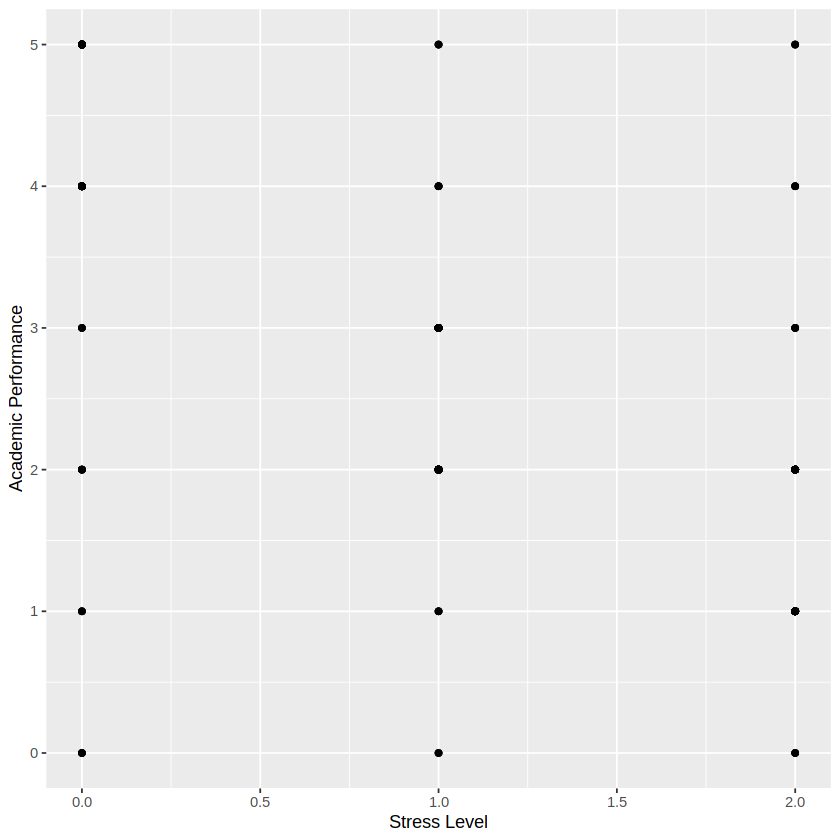

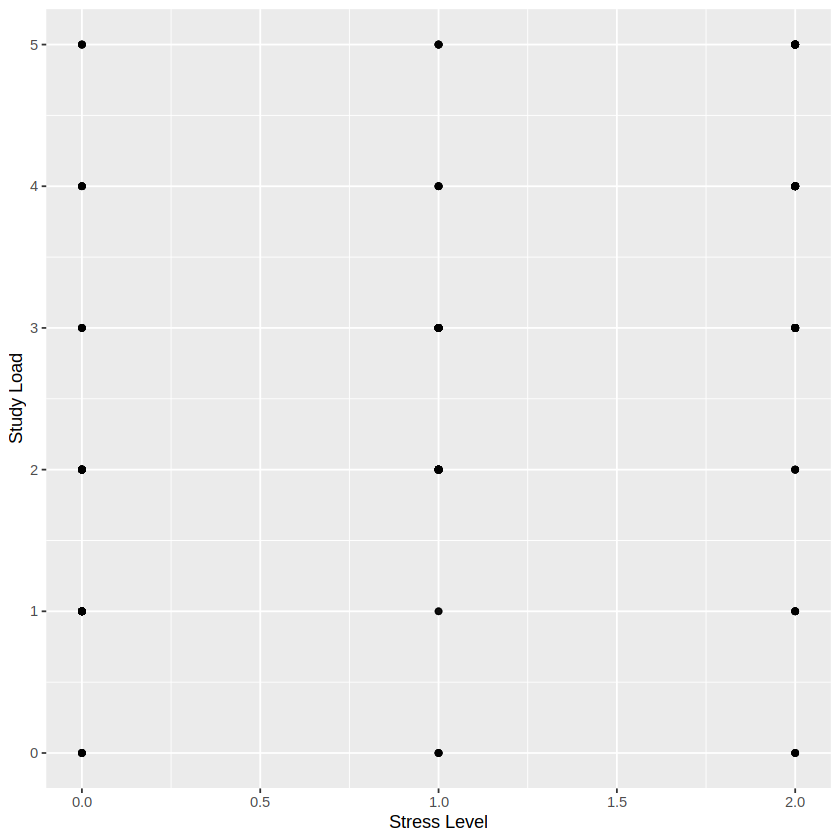

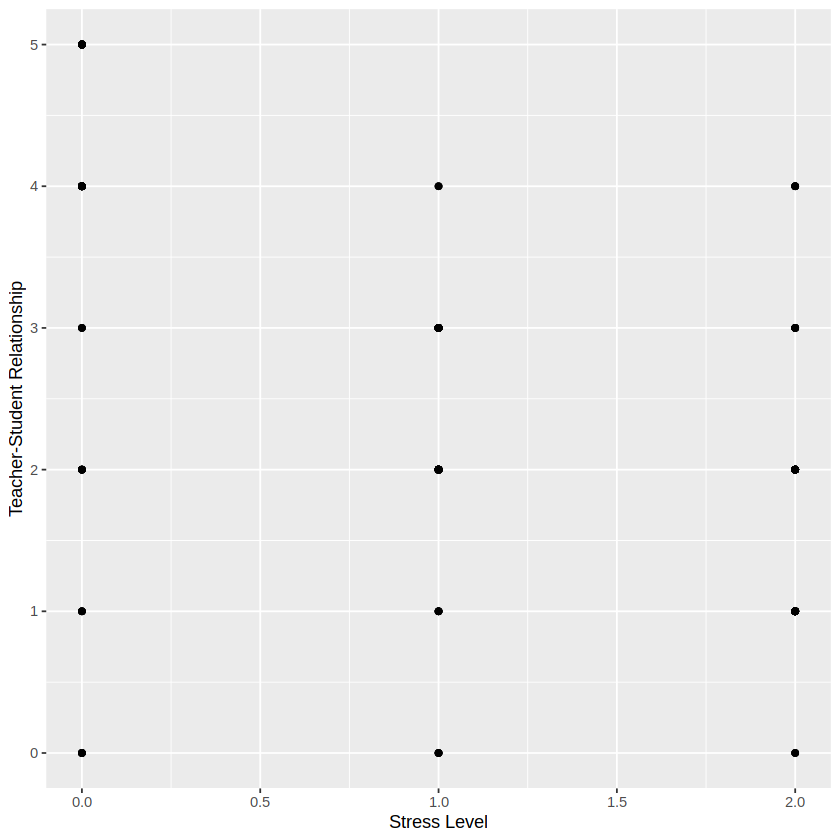

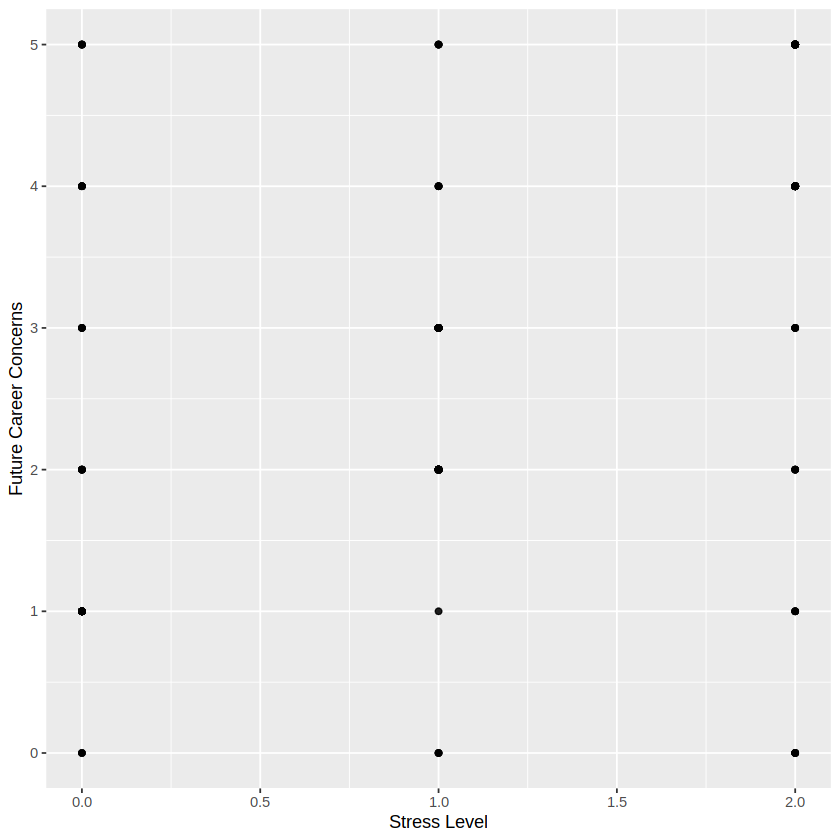

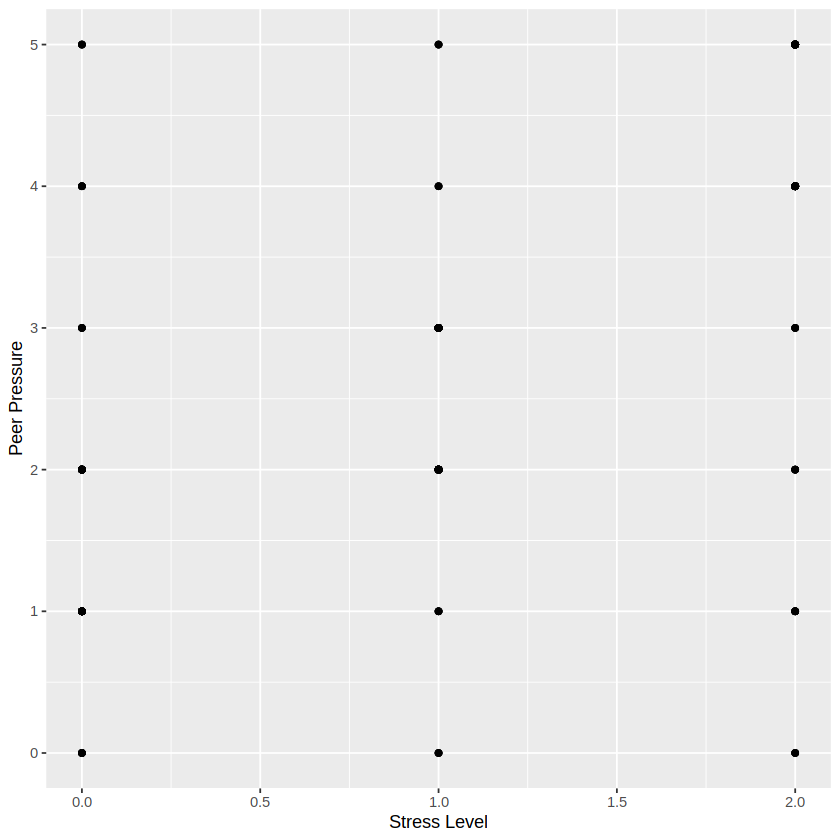

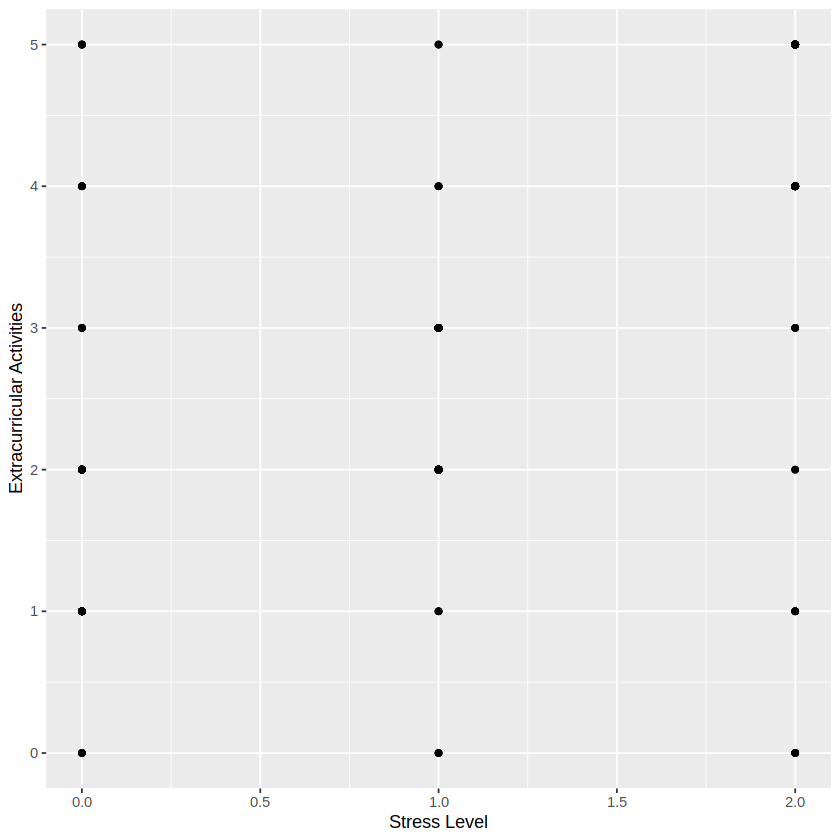

In [18]:
stress_plot1 <- stress_level_selected |>
    ggplot(aes(x = stress_level, y = academic_performance)) +
    geom_point(alpha = 0.5) +
    labs(x = "Stress Level", y = "Academic Performance")

stress_plot2 <- stress_level_selected |>
    ggplot(aes(x = stress_level, y = study_load)) +
    geom_point(alpha = 0.5) +
    labs(x = "Stress Level", y = "Study Load")

stress_plot3 <- stress_level_selected |>
    ggplot(aes(x = stress_level, y = teacher_student_relationship)) +
    geom_point(alpha = 0.5) +
    labs(x = "Stress Level", y = "Teacher-Student Relationship")

stress_plot4 <- stress_level_selected |>
    ggplot(aes(x = stress_level, y = future_career_concerns)) +
    geom_point(alpha = 0.5) +
    labs(x = "Stress Level", y = "Future Career Concerns")

stress_plot5 <- stress_level_selected |>
    ggplot(aes(x = stress_level, y = peer_pressure)) +
    geom_point(alpha = 0.5) +
    labs(x = "Stress Level", y = "Peer Pressure")

stress_plot6 <- stress_level_selected |>
    ggplot(aes(x = stress_level, y = extracurricular_activities)) +
    geom_point(alpha = 0.5) +
    labs(x = "Stress Level", y = "Extracurricular Activities")

stress_plot1
stress_plot2
stress_plot3
stress_plot4
stress_plot5
stress_plot6